In [1]:
import pandas as pd
import numpy as np
import matplotlib
import sys

from readCanLitefileUtils import *
from calibUtils import *

In [2]:
# define the inputs

#file 1 (DACset 0x000)
#file_DACset000 = './files/21-05-06_160653_calib_SN04_DACSet000_20x.csv'
#file_DACset000 = './files/SN11/21-05-20_110216_DACset000_SN11_20x.csv'
#file_DACset000 = './files/SN11/21-05-20_110216_DACset000_SN11_20x_v2.csv'
#file_DACset000 = './files/SN11/21-05-28_105657_DACset000_SN11_20x_v3.csv'
file_DACset000 = './files/SN15/21-05-27_151342_DACset000_SN15_20x.csv'



#file 2 (DACset 0xFFF)
#file_DACsetFFF = './files/21-05-06_160653_calib_SN04_DACSetFFF_20x.csv'
#file_DACsetFFF = './files/SN11/21-05-20_110216_DACsetFFF_SN11_20x.csv'
#file_DACsetFFF = './files/SN11/21-05-20_110216_DACsetFFF_SN11_20x_v2.csv'
#file_DACsetFFF = './files/SN11/21-05-28_105657_DACsetFFF_SN11_20x_v3.csv'
file_DACsetFFF = './files/SN15/21-05-27_151342_DACsetFFF_SN15_20x.csv'


#SN11
#DMMmin = [108.718, 108.744, 108.752, 108.746, 108.739, 108.722, 
#          108.736, 108.699, 108.750, 108.747, 108.743, 108.732]

#DMMmax = [116.288, 116.275, 116.328, 116.291, 116.273, 116.282,
#          116.311, 116.267, 116.327, 116.316, 116.219, 116.250]

#SN11 v3
#DMMmin = [108.716, 108.745, 108.750, 108.745, 108.740, 108.722, 
#          108.736, 108.700, 108.750, 108.747, 108.744, 108.733]

#DMMmax = [116.287, 116.313, 116.326, 116.324, 116.314, 116.293,
#          116.312, 116.268, 116.329, 116.315, 116.220, 116.304]

#SN15
DMMmin = [108.744, 108.715, 108.768, 108.729, 108.751, 108.717, 
          108.708, 108.712, 108.760, 108.729, 108.759, 108.726]

DMMmax = [116.318, 116.291, 116.347, 116.302, 116.329, 116.293,
          116.279, 116.289, 116.335, 116.305, 116.333, 116.298]

#file_HVoff = './files/SN11/21-05-20_110216_HVoff_SN11_20x.csv'
#file_HVoff = './files/SN11/21-05-28_105657_HVoff_SN11_20x_v3.csv'
file_HVoff = './files/SN15/21-05-27_151342_HVoff_SN15_20x.csv'

#SN11
#DMMHVmin = 1.305
#DMMHVmax = 120.

#DMMHVmin = 1.381
#DMMHVmax = 119.997


#SN15
DMMHVmin = 1.387
DMMHVmax = 119.992


#data for HV calibration (SN04)
#data_HV = {'ADCmin': [0x02EB], 'DMMmin': [1.378], 'ADCmax': [0xFEB5], 'DMMmax': [120]}
#df_HV = pd.DataFrame(data=data_HV)

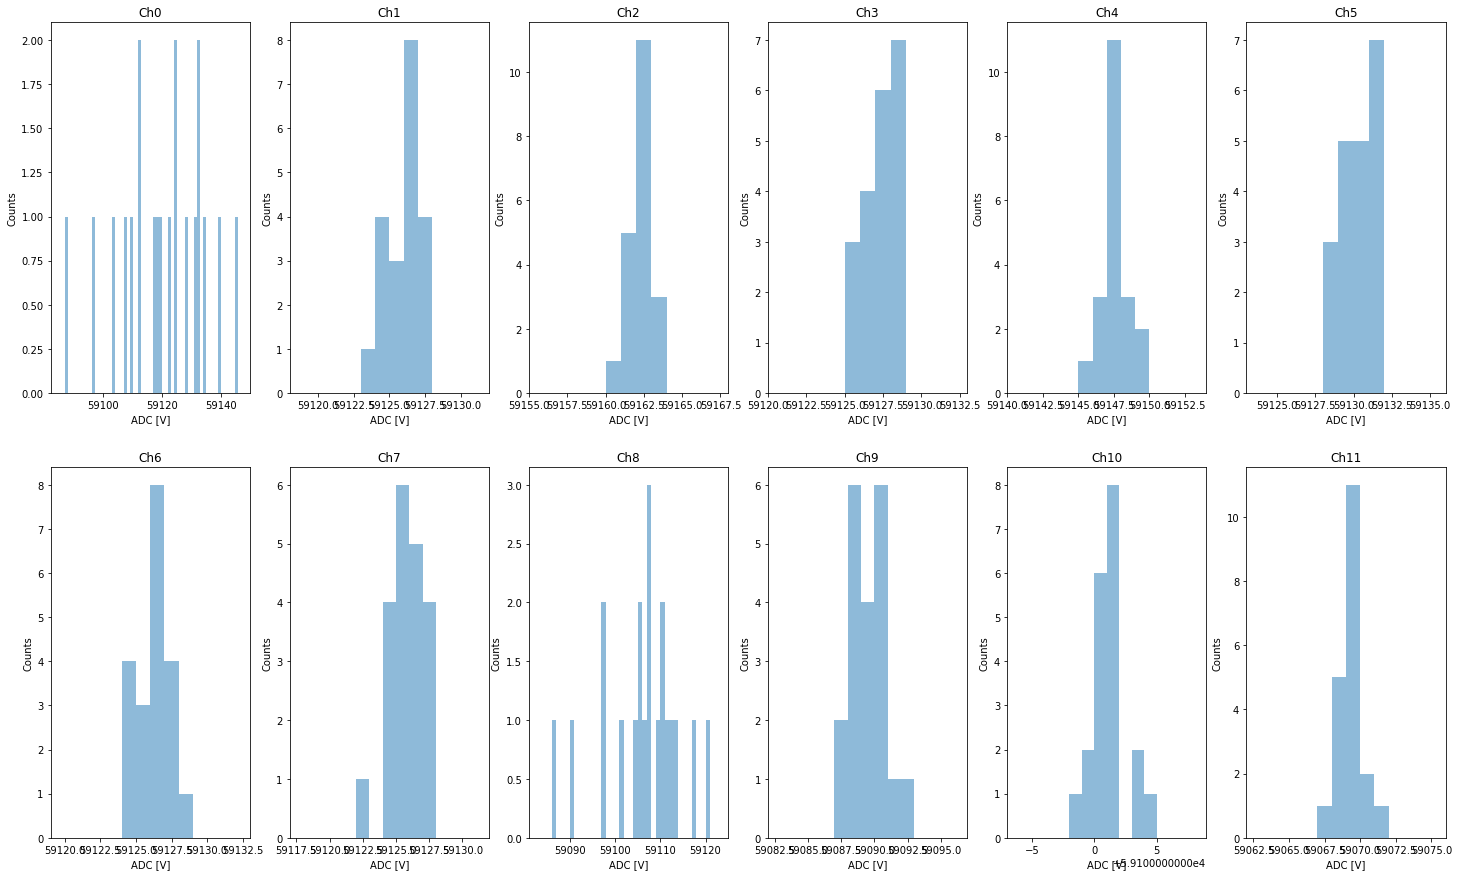

-----
0x0
['e6f0', 'e6f6', 'e71a', 'e6f7', 'e70b', 'e6fa', 'e6f6', 'e6f5', 'e6e2', 'e6d1', 'e6dd', 'e6bd']
0xfd84


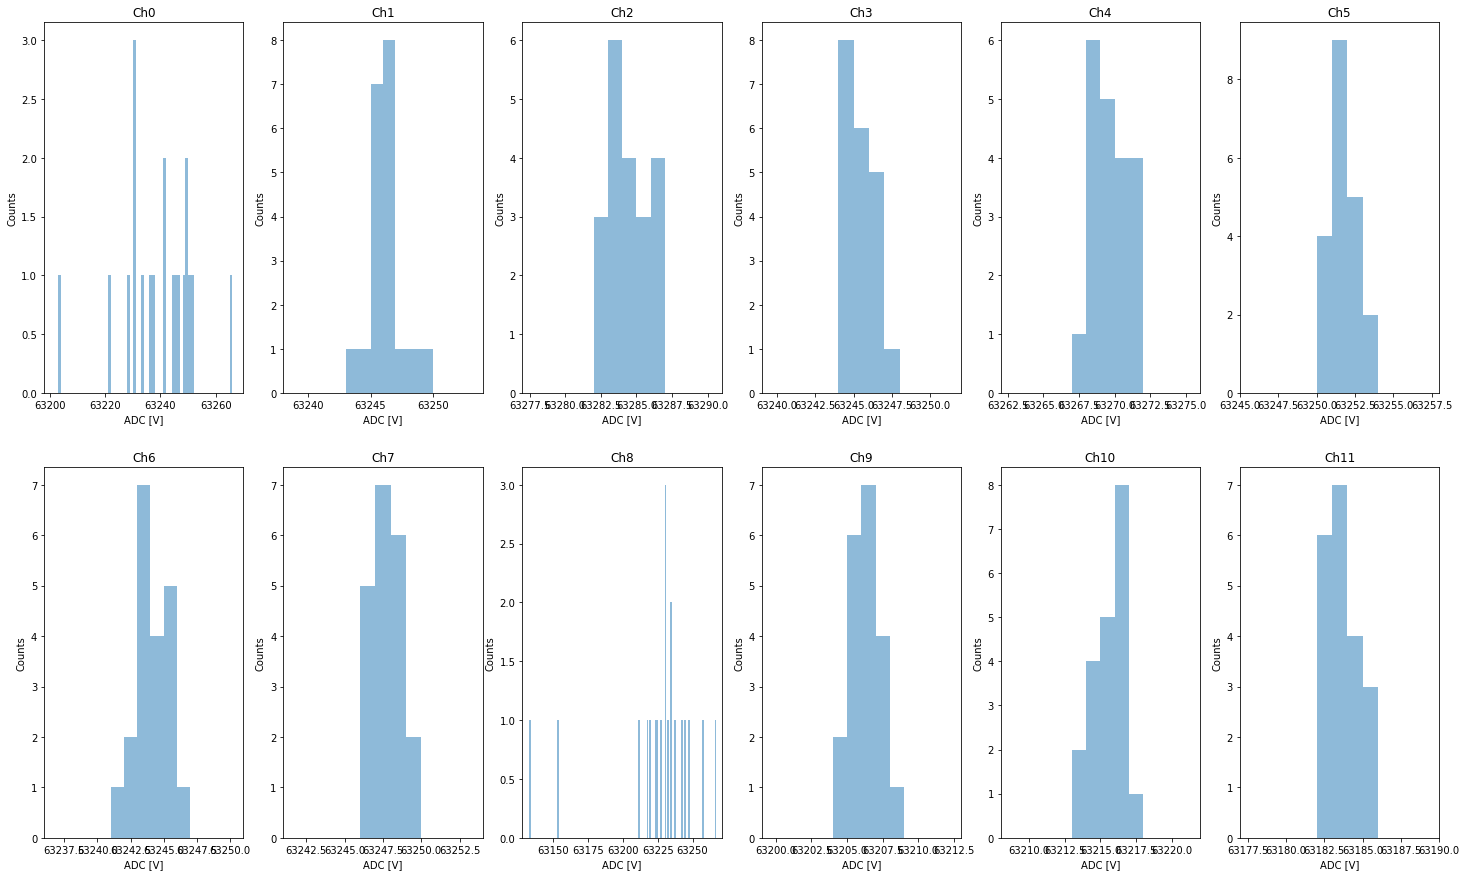

0xfff
['f707', 'f70e', 'f734', 'f70d', 'f725', 'f713', 'f70c', 'f70f', 'f6f8', 'f6e6', 'f6ef', 'f6cf']
0xfd71


In [3]:
DACset000, ADCmin, HVmin = GetADCvalues(file_DACset000)
print('-----')
print(DACset000)
print(ADCmin)
print(HVmin)

DACsetFFF, ADCmax, HVmax = GetADCvalues(file_DACsetFFF)
print(DACsetFFF)
print(ADCmax)
print(HVmax)



In [4]:
#the HVmin value is overwitten by the good one which comes from the file with HV OFF

HVmin = GetHVvalue(file_HVoff)
HVmin

'0xe4f'

In [5]:
#data for HV calibration
data_HV = {'ADCmin': [HVmin], 'DMMmin': [DMMHVmin], 'ADCmax': [HVmax], 'DMMmax': [DMMHVmax]}
df_HV = pd.DataFrame(data=data_HV)
df_HV

,ADCmin,DMMmin,ADCmax,DMMmax
0,0xe4f,1.381,0xfd77,119.997


DACset000 = '0x0'
DACsetFFF = '0xfff'
#tmp fix for SN11

In [6]:
#build the dataframe to use to extract the calibration parameters
if (DACset000 == '0x0'):
    col0 = 'ADCmin'
else: 
    #print('Error! not the expected values for the DACset')
    sys.exit('Error! not the expected values for the DACset')


if (DACsetFFF == '0xfff'):
    col3 = 'ADCmax'
else: 
    sys.exit('Error! not the expected values for the DACset')
    

df_out = pd.DataFrame(list(zip(ADCmin, DMMmin, ADCmax, DMMmax)), columns = [col0, 'DMMmin' ,  col3, 'DMMmax'])
df_out

,ADCmin,DMMmin,ADCmax,DMMmax
0,e6ae,108.716,f6c0,116.287
1,e6ce,108.745,f6de,116.313
2,d78f,108.750,e557,116.326
3,e6c8,108.745,f6dd,116.324
4,e6ce,108.740,f6e2,116.314
5,e6c0,108.722,f6d1,116.293
6,e6cb,108.736,f6e0,116.312
7,e6bb,108.700,f6cc,116.268
8,e6d1,108.750,f704,116.329
9,d710,108.747,e4e0,116.315


In [7]:
#convert ADCmin and ADCmax in decimal numbers
df_out = hex_to_dec(df_out)
df_out

,ADCmin,DMMmin,ADCmax,DMMmax
0,59054,108.716,63168,116.287
1,59086,108.745,63198,116.313
2,55183,108.750,58711,116.326
3,59080,108.745,63197,116.324
4,59086,108.740,63202,116.314
5,59072,108.722,63185,116.293
6,59083,108.736,63200,116.312
7,59067,108.700,63180,116.268
8,59089,108.750,63236,116.329
9,55056,108.747,58592,116.315


In [8]:
# compute gain and offset for the Bias Voltages
# a_coeff = 1.8535e-3
# b_coeff = 0
# Gain BiasV = (DMMmax - DMMmin) / (ADCmax - ADCmin ) * 1/a_coeff
# offset BiasV = ADCmin - (DMMmin - b_coeff )/ (Gain BiasV * a_coeff )

df_out = biasV_params(df_out)
df_out

,ADCmin,DMMmin,ADCmax,DMMmax,Gain BiasV,offset BiasV
0,59054,108.716,63168,116.287,0.992879,21.105534
1,59086,108.745,63198,116.313,0.992968,-0.450317
2,55183,108.750,58711,116.326,1.158561,-4540.180570
3,59080,108.745,63197,116.324,0.993204,-8.464837
4,59086,108.740,63202,116.314,0.992790,7.456562
5,59072,108.722,63185,116.293,0.993120,-7.994453
6,59083,108.736,63200,116.312,0.992811,7.035903
7,59067,108.700,63180,116.268,0.992727,8.462474
8,59089,108.750,63236,116.329,0.986019,415.716981
9,55056,108.747,58592,116.315,1.154719,-4246.090909


In [9]:
# Gain biasV = math.ceil(Gain BiasV* 32768)
# Offset biasV = round(offset BiasV)  

df_out = code_offsetandgain(df_out,'biasV')
df_out

,ADCmin,DMMmin,ADCmax,DMMmax,Gain BiasV,offset BiasV,Gain_Usig BiasV,Offset_Sig BiasV
0,59054,108.716,63168,116.287,0.992879,21.105534,32535,21
1,59086,108.745,63198,116.313,0.992968,-0.450317,32538,0
2,55183,108.750,58711,116.326,1.158561,-4540.180570,37964,-4540
3,59080,108.745,63197,116.324,0.993204,-8.464837,32545,-8
4,59086,108.740,63202,116.314,0.992790,7.456562,32532,7
5,59072,108.722,63185,116.293,0.993120,-7.994453,32543,-8
6,59083,108.736,63200,116.312,0.992811,7.035903,32532,7
7,59067,108.700,63180,116.268,0.992727,8.462474,32530,8
8,59089,108.750,63236,116.329,0.986019,415.716981,32310,416
9,55056,108.747,58592,116.315,1.154719,-4246.090909,37838,-4246


In [10]:
# convert following prescriptions
 # GainUsig BiasV   = hex(Gain_Usig BiasV) 
 # Offset_Sig BiasV = tohextwocompl(Offset_Sig BiasV ,15) 

df_out = convert_to_exadec(df_out, 'biasV')
df_out

,ADCmin,DMMmin,ADCmax,DMMmax,Gain BiasV,offset BiasV,Gain_Usig BiasV,Offset_Sig BiasV,Gain_hex BiasV,Offset_hex BiasV
0,59054,108.716,63168,116.287,0.992879,21.105534,32535,21,0x7f17,0x15
1,59086,108.745,63198,116.313,0.992968,-0.450317,32538,0,0x7f1a,0x0
2,55183,108.750,58711,116.326,1.158561,-4540.180570,37964,-4540,0x944c,0xee44
3,59080,108.745,63197,116.324,0.993204,-8.464837,32545,-8,0x7f21,0xfff8
4,59086,108.740,63202,116.314,0.992790,7.456562,32532,7,0x7f14,0x7
5,59072,108.722,63185,116.293,0.993120,-7.994453,32543,-8,0x7f1f,0xfff8
6,59083,108.736,63200,116.312,0.992811,7.035903,32532,7,0x7f14,0x7
7,59067,108.700,63180,116.268,0.992727,8.462474,32530,8,0x7f12,0x8
8,59089,108.750,63236,116.329,0.986019,415.716981,32310,416,0x7e36,0x1a0
9,55056,108.747,58592,116.315,1.154719,-4246.090909,37838,-4246,0x93ce,0xef6a


In [11]:
#do the same for the HV
#Compute gain and offset for the HV

# a_coeff = 1.8409e-3
# b_coeff = 0
# Gain BiasV = (DMMmax - DMMmin) / (ADCmax - ADCmin ) * 1/a_coeff
# offset BiasV = ADCmin - (DMMmin - b_coeff )/ (Gain BiasV * a_coeff )

df_HV = hex_to_dec(df_HV)
df_HV = HV_params(df_HV)
df_HV

,ADCmin,DMMmin,ADCmax,DMMmax,Gain HV,offset HV
0,3663,1.381,64887,119.997,1.052426,-2950.192756


In [12]:
# Gain HV = math.ceil(Gain HV* 32768)
# Offset HV = round(offset HV)  

df_HV = code_offsetandgain(df_HV,'HV')
df_HV

,ADCmin,DMMmin,ADCmax,DMMmax,Gain HV,offset HV,Gain_Usig HV,Offset_Sig HV
0,3663,1.381,64887,119.997,1.052426,-2950.192756,34486,-2950


In [13]:
# convert following prescriptions
# GainUsig BiasV   = hex(Gain_Usig HV) 
# Offset_Sig BiasV = tohextwocompl(Offset_Sig HV ,15) 

df_HV = convert_to_exadec(df_HV, 'HV')
df_HV

,ADCmin,DMMmin,ADCmax,DMMmax,Gain HV,offset HV,Gain_Usig HV,Offset_Sig HV,Gain_hex HV,Offset_hex HV
0,3663,1.381,64887,119.997,1.052426,-2950.192756,34486,-2950,0x86b6,0xf47a


In [14]:
df_calib_biasV = df_out[['Gain_hex BiasV','Offset_hex BiasV'] ].copy()
df_calib_biasV.to_csv('calibDB/calib_biasV_SN11_v3.csv')
print(df_calib_biasV)

print('\n\n\n')
df_calib_HV = df_HV[['Gain_hex HV','Offset_hex HV'] ].copy()
df_calib_HV.to_csv('calibDB/calib_HV_SN11_v3.csv')
print(df_calib_HV)

   Gain_hex BiasV Offset_hex BiasV
0          0x7f17             0x15
1          0x7f1a              0x0
2          0x944c           0xee44
3          0x7f21           0xfff8
4          0x7f14              0x7
5          0x7f1f           0xfff8
6          0x7f14              0x7
7          0x7f12              0x8
8          0x7e36            0x1a0
9          0x93ce           0xef6a
10         0x7d5f            0x311
11         0x7f17           0xfff7




  Gain_hex HV Offset_hex HV
0      0x86b6        0xf47a


In [15]:
df_calib_biasV_tocheck = df_out[['Gain_Usig BiasV', 'Offset_Sig BiasV', 'Gain_hex BiasV','Offset_hex BiasV']].copy()
#df_calib_biasV_tocheck.to_csv('calibDB/calib_biasV_SN11_v2_forcheck.csv')
df_calib_biasV_tocheck.to_csv('calibDB/calib_biasV_SN11_v3_forcheck.csv')